In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

# Tips

### CDF
 - Menor o igual / Mayor que (Con consideración especial)
### PMF
 - Igual

# Parte 1

## Dado de 20 caras

In [2]:
dado= stats.randint(low=1, high=21)

### Obtener valor entre 6 y 9

In [3]:
P6=dado.pmf(6)
P7=dado.pmf(7)
P8=dado.pmf(8)
P9=dado.pmf(9)

In [4]:
def sumatoria(*args):
    return sum(args)

In [5]:
sumatoria(P6,P7,P8,P9)

0.2

In [6]:
dado.pmf([6,7,8,9]).sum()

0.2

### Ejemplo de n lanzamientos

In [7]:
for i in range(12):
    print("Lanzamiento #",i,":",dado.rvs())

Lanzamiento # 0 : 17
Lanzamiento # 1 : 9
Lanzamiento # 2 : 17
Lanzamiento # 3 : 5
Lanzamiento # 4 : 6
Lanzamiento # 5 : 2
Lanzamiento # 6 : 17
Lanzamiento # 7 : 13
Lanzamiento # 8 : 2
Lanzamiento # 9 : 6
Lanzamiento # 10 : 11
Lanzamiento # 11 : 1


### Obtener al menos 12

In [16]:
dado.cdf(12) #Obtener 12 o menos

0.6

In [17]:
1-dado.cdf(12) #Obtener más de 12 (13,14,...,20)

0.4

In [18]:
1-dado.cdf(11) #Obtener más de 11 (12,...,20) --> Al menos 12

0.44999999999999996

### Obtener 3 o menos

In [20]:
dado.cdf(3)

0.15

### Gráfico de la pmf

(0.0, 1.0)

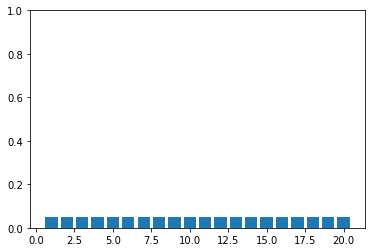

In [8]:
plt.bar(range(1,21),dado.pmf(range(1,21)))
plt.ylim([0,1])

# Parte 2

## Apagador

In [28]:
# Tip: El apagador posee dos estados, encendido(0) y apagado(1).
# Que distribución funciona con dos estados? R= Binomial 
# Verdadero y Falso ó 0 y 1

# EL apagador funciona 1 de 5 veces --> Probabilidad de que funcione

# Para la distribución necesitaremos el número de veces que se acciona
# y la probabilidad de que funcione

In [14]:
prob = 1/5
veces = 15
apagador = stats.binom(veces,prob)
apagador

In [29]:
# Al accionarlo 15 veces calcular las probabilidades de que:

In [30]:
# Funcione 9 veces

In [15]:
apagador.pmf(9)

0.000671759728640003

In [31]:
# Funcione menos de 4 veces

In [16]:
apagador.cdf(3)

0.648162104573952

In [32]:
# Funcione 3 o más veces

In [18]:
1-apagador.cdf(4)

0.16423372393676794

In [ ]:
# Graficar la pmf

<BarContainer object of 15 artists>

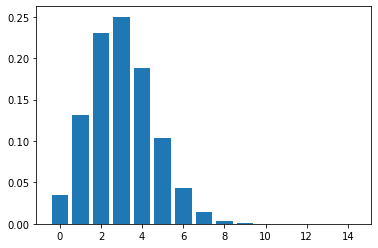

In [19]:
plt.bar(range(0,15),apagador.pmf(range(0,15)))

# Parte 3


# En una línea de producción se estrellan 3 vitrales por hora, calcular las probabilidades de:




# P(Estrellar un vitral por hora)


In [24]:
eventos = stats.poisson(mu=3)
eventos.pmf(1)

0.14936120510359185

 ### P(Estrellar entre 4 y 7 por hora)

In [25]:
eventos.pmf([4,5,6,7]).sum()

0.34086360736141147

### P(Estrellar menos de 6 por hora)

In [26]:
eventos.cdf(5)

0.9160820579686966

<BarContainer object of 24 artists>

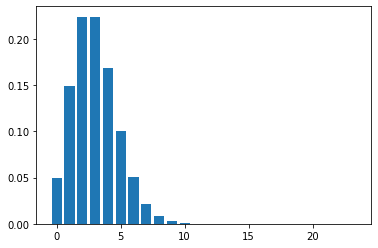

In [27]:
plt.bar(range(0,24),eventos.pmf(range(0,24)))

# Parte 4
# El documento sqft.csv, contiene el área en pies cuadrados (sqft) de un conjunto de hogares, con esta información calcular:

In [28]:
df = pd.read_csv("sqft.csv")

In [29]:
df.head(5)

,sqft
0,1788.733268
1,1763.827324
2,1651.993341
3,1603.205624
4,1472.958266


array([[<AxesSubplot:title={'center':'sqft'}>]], dtype=object)

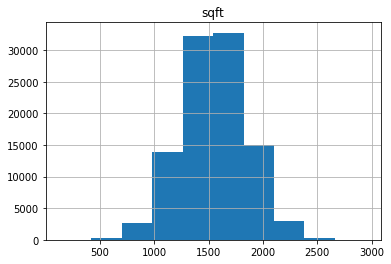

In [30]:
df.hist()

### P(Una casa posea 830 +/- 25 sqft)

In [40]:
mean = df.mean()
std = df.std()
v_805 =  stats.norm.cdf(805,loc = mean, scale = std )
v_855 =  stats.norm.cdf(855,loc = mean, scale = std )

In [42]:
print(v_855-v_805)

[0.00372463]


### P(Una casa posea más de 3000 sqft)

In [47]:
v_3000 = stats.norm.cdf(3000,loc = mean, scale = std )
print(1-v_3000)

[6.42448684e-07]


### P(Una casa posea menos de 275 sqft)

In [48]:
v_275 = stats.norm.cdf(275,loc = mean, scale = std )
print(v_275)

[1.03531638e-05]


# Parte 5

### Un mecanógrafo comete una media de 2 errores por página ¿Cuál es la probabilidad de que una página concreta no tenga errores?

In [51]:
eventos = stats.poisson(mu=2)
eventos.pmf(0)
##plt.bar(range(0,24),eventos.pmf(range(0,24)))

0.1353352832366127

### Los componentes se embalan en cajas de 20. La probabilidad de que un componente individual sea defectuoso es del 10%. Calcula las siguientes probabilidades:

In [52]:
prob = stats.binom(20,0.1)

### Que una caja contenga exactamente 2 componentes defectuosos

In [53]:
prob.pmf(2)

0.28517980706429813

### Qué una caja contenga máximo 2 componentes defectuosos

In [55]:
prob.cdf(1)

0.3917469981251682

### Los clientes llegan a un bar local a un ritmo de 30 por hora. ¿Cuál es la probabilidad de que el portero pueda tomarse un descanso de tres minutos para ir al baño sin perder al siguiente cliente?


In [57]:
prob = stats.expon.cdf(3,0.5)
prob

0.9179150013761012

# Parte 6

### Tienes que encontrar a una persona alta, de al menos 1,80 metros, para que te ayude a alcanzar un tarro de galletas. El 8% de la población mide 1,80 m o más, y la gente pasa de media dos veces por minuto. Si esperas en la acera, ¿cuál es la probabilidad de que tengas que esperar más de diez minutos para conseguir unas galletas?

In [59]:
prob = stats.expon(0,2)
prob

In [62]:
(1-prob.cdf(10))*0.08

0.000539035759926838

### Un pasajero apresurado llegará varios minutos tarde a un vuelo programado para las 10 de la mañana a Nueva York. Sin embargo, es posible que llegue al vuelo, ya que el embarque siempre se permite hasta las 10:10 A.M., y a veces se permite el embarque hasta las 10:30 AM. Suponiendo que la hora de finalización del intervalo de embarque se distribuye uniformemente sobre los límites anteriores, encuentre la probabilidad de que el pasajero llegue a su vuelo, suponiendo que llega a la puerta de embarque a las 10:25.

In [63]:
prob = stats.randint(low=10, high=30)
prob.pmf(25)

0.05

<BarContainer object of 30 artists>

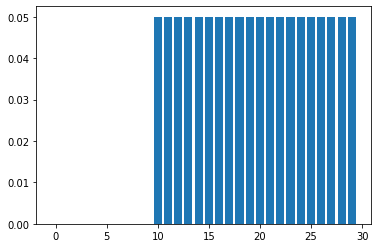

In [64]:
plt.bar(range(0,30),prob.pmf(range(0,30)))

# Parte 7


### Tu gato empieza a pedir la cena a las 3:30 todos los días, y sospechas que maúlla a un ritmo fijo. Has observado que aproximadamente una quinta parte de las veces tu gato no maúlla hasta las 3:40, lo que te da 10 minutos inesperados de tranquilidad. ¿Cuál es la probabilidad de que tu gato te deje tranquilo durante 30 minutos?

In [66]:
prob = stats.poisson(mu=1/5)
prob.pmf(3)

0.0010916410041039767

### De alguna manera, has acabado con dos tipos de tenedores. Están los tenedores buenos, que son grandes y sirven para un bocado sano, pero también están estos pequeños y finos que no entiendes muy bien para qué sirven, probablemente deberías deshacerte de ellos. Necesitas dos tenedores para ti y tu pareja, y coge un puñado de 5. Si hay 14 tenedores en el cajón, de los cuales la mitad son del tipo bueno, ¿cuál es la probabilidad de que tengas al menos los dos tenedores buenos que necesitas?

In [74]:
prob = stats.nhypergeom(M=14, n=7, r=5)
prob

AttributeError: module 'scipy.stats' has no attribute 'nhypergeom'

In [68]:
prob.pmf(2)

0.36713286713286725

# Parte 8

### De los alumnos de una clase, el 60% son genios, el 70% aman el chocolate y el 40% entran en ambas categorías. Determina la probabilidad de que un alumno seleccionado al azar no sea ni un genio ni un amante del chocolate.